In [102]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [103]:
df1 = pd.read_csv('../data/dataset_tiktok-comments-scraper_2025-11-10_14-09-34-505.csv')
df2 = pd.read_csv('../data/dataset_tiktok-comments-scraper_2025-11-10_14-12-44-217.csv')
df3 = pd.read_csv('../data/dataset_tiktok-comments-scraper_2025-11-10_14-16-03-810.csv')
df4 = pd.read_csv('../data/dataset_tiktok-comments-scraper_2025-11-10_14-22-05-269.csv')
df5 = pd.read_csv('../data/dataset_tiktok-comments-scraper_2025-11-11_08-36-00-955.csv')

In [104]:
df = pd.concat([df1, df2, df3, df4, df5], ignore_index=True)

In [105]:
df.head(5)

,avatarThumbnail,cid,createTime,createTimeISO,detailedMentions/0/nickName,detailedMentions/0/profileUrl,detailedMentions/0/secUid,detailedMentions/0/userId,diggCount,input,...,detailedMentions/4/userId,detailedMentions/5/nickName,detailedMentions/5/profileUrl,detailedMentions/5/secUid,detailedMentions/5/userId,mentions/1,mentions/2,mentions/3,mentions/4,mentions/5
0,https://p16-common-sign.tiktokcdn-us.com/tos-m...,7536994798282277640,1754843358,2025-08-10T16:29:18.000Z,NaN,NaN,NaN,NaN,27961,https://vt.tiktok.com/ZSyqCWpXa/,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://p16-common-sign.tiktokcdn-us.com/tos-u...,7537001616776725269,1754844944,2025-08-10T16:55:44.000Z,NaN,NaN,NaN,NaN,9259,https://vt.tiktok.com/ZSyqCWpXa/,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://p16-common-sign.tiktokcdn-us.com/tos-a...,7537161096046986002,1754882080,2025-08-11T03:14:40.000Z,NaN,NaN,NaN,NaN,18342,https://vt.tiktok.com/ZSyqCWpXa/,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://p16-common-sign.tiktokcdn-us.com/tos-a...,7537004186476446482,1754845543,2025-08-10T17:05:43.000Z,NaN,NaN,NaN,NaN,3679,https://vt.tiktok.com/ZSyqCWpXa/,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://p16-common-sign.tiktokcdn-us.com/tos-a...,7537000197430051592,1754844614,2025-08-10T16:50:14.000Z,NaN,NaN,NaN,NaN,269,https://vt.tiktok.com/ZSyqCWpXa/,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7166 entries, 0 to 7165
Data columns (total 45 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   avatarThumbnail                7166 non-null   object 
 1   cid                            7166 non-null   int64  
 2   createTime                     7166 non-null   int64  
 3   createTimeISO                  7166 non-null   object 
 4   detailedMentions/0/nickName    162 non-null    object 
 5   detailedMentions/0/profileUrl  162 non-null    object 
 6   detailedMentions/0/secUid      161 non-null    object 
 7   detailedMentions/0/userId      161 non-null    float64
 8   diggCount                      7166 non-null   int64  
 9   input                          7166 non-null   object 
 10  likedByAuthor                  7166 non-null   bool   
 11  mentions/0                     162 non-null    object 
 12  pinnedByAuthor                 4888 non-null   o

In [107]:
cols = [
    'text',
    'createTimeISO',
    'diggCount',
    'replyCommentTotal',
    'uniqueId',
    'likedByAuthor',
    'pinnedByAuthor',
    'submittedVideoUrl'
]
df_filter = df[cols]

In [108]:
df_filter

,text,createTimeISO,diggCount,replyCommentTotal,uniqueId,likedByAuthor,pinnedByAuthor,submittedVideoUrl
0,nyokap gausah ikut2 itu anak ibu udah segitu g...,2025-08-10T16:29:18.000Z,27961,64.0,maciebetthi09,False,False,https://vt.tiktok.com/ZSyqCWpXa/
1,emg anak anak anjjjjj,2025-08-10T16:55:44.000Z,9259,58.0,zamm____,False,False,https://vt.tiktok.com/ZSyqCWpXa/
2,Anak Ibu udah Dewasa Bu.. lanjutkan Pak Andre ...,2025-08-11T03:14:40.000Z,18342,255.0,muhammadhenrykurnia,False,False,https://vt.tiktok.com/ZSyqCWpXa/
3,Tau kan kenapa anaknya sifatnya begitu? Krna o...,2025-08-10T17:05:43.000Z,3679,99.0,nunastory_,False,False,https://vt.tiktok.com/ZSyqCWpXa/
4,Bu kl ibu kaya gini berarti bener ibu tidak me...,2025-08-10T16:50:14.000Z,269,24.0,julitaa260,False,False,https://vt.tiktok.com/ZSyqCWpXa/
...,...,...,...,...,...,...,...,...
7161,meskipun fakta berbicara itu harus ada tempatn...,2025-08-13T00:04:42.000Z,0,0.0,bang.madara,False,False,https://vt.tiktok.com/ZSygG1BMh/
7162,nyebut merek ditambah yang mereka lawan keluar...,2025-08-12T23:53:40.000Z,0,0.0,faruq.alkhatiri12,False,False,https://vt.tiktok.com/ZSygG1BMh/
7163,kegocek lagi aje,2025-08-12T21:16:33.000Z,0,0.0,elyxxxxxyr,False,False,https://vt.tiktok.com/ZSygG1BMh/
7164,gua mau komen tapi gak suka dua²nya,2025-08-12T20:22:11.000Z,0,0.0,sugus3101,False,False,https://vt.tiktok.com/ZSygG1BMh/


In [109]:
print('Jumlah Data Duplikat: ', df_filter.duplicated().sum())
print('\nJumlah Data Kosong: ')
print(df_filter.isnull().sum())

Jumlah Data Duplikat:  0

Jumlah Data Kosong: 
text                  183
createTimeISO           0
diggCount               0
replyCommentTotal    2332
uniqueId                0
likedByAuthor           0
pinnedByAuthor       2278
submittedVideoUrl       0
dtype: int64


In [110]:
df_filter = df_filter.dropna(subset=['text'])
print(df_filter.isnull().sum())

text                    0
createTimeISO           0
diggCount               0
replyCommentTotal    2235
uniqueId                0
likedByAuthor           0
pinnedByAuthor       2185
submittedVideoUrl       0
dtype: int64


In [111]:
top_comments = df_filter.sort_values('diggCount', ascending=False).head(10)
top_comments[['uniqueId','text','diggCount']]

,uniqueId,text,diggCount
1036,wiilaja3,agama dibuat lelucon dikira lucu,71557
1039,radit.subakti,Demi Allah gw benci banget sama si botak itu,58034
4155,whitecountryoldr0ad,makin diginiin makin kesenengan dia ko 😭😭,57432
4152,nanakoot,Smp ngguyuuuu gulung koming aku nonton ini .. ...,53972
4017,faa_ajaa40,idaman bocil puber 😂🤭,47522
4016,digitproduk,tapi attitude 0,39895
1042,udrabeast,gw bingung kok ada yg ngikutin nontonin bigmo,36913
4150,user857356400195,makasih sudah bantu promoin bigmo. 🔥,34118
4019,nandisannius_96,BIGMO HAMA DARI SURABAYA 🤪🤪🤪,30850
0,maciebetthi09,nyokap gausah ikut2 itu anak ibu udah segitu g...,27961


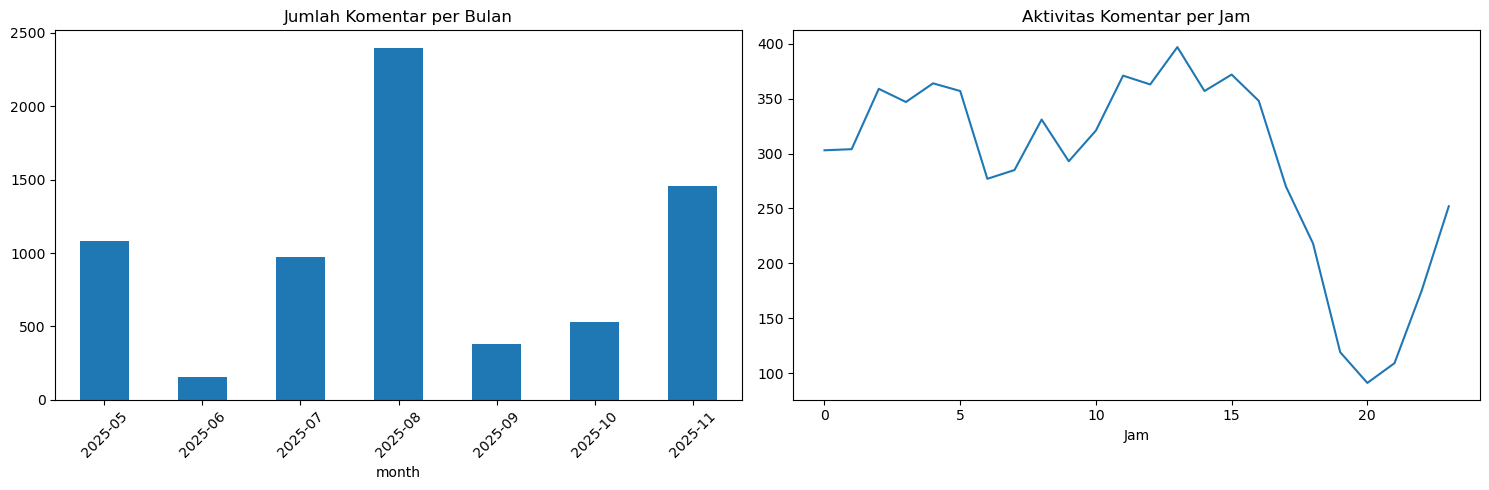

In [112]:
df_vis_comment_month = df_filter.copy()

df_vis_comment_month['createTimeISO'] = pd.to_datetime(df_vis_comment_month['createTimeISO'])

df_vis_comment_month['month'] = df_vis_comment_month['createTimeISO'].dt.strftime('%Y-%m')
df_vis_comment_month['hour'] = df_vis_comment_month['createTimeISO'].dt.hour

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

df_vis_comment_month['month'].value_counts().sort_index().plot(kind='bar', ax=ax1)
ax1.set_title('Jumlah Komentar per Bulan')
ax1.tick_params(axis='x', rotation=45)

df_vis_comment_month['hour'].value_counts().sort_index().plot(kind='line', ax=ax2)
ax2.set_title('Aktivitas Komentar per Jam')
ax2.set_xlabel('Jam')
plt.tight_layout()
plt.show()